In [8]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

In [9]:
file = 'sample_submission.csv'
df = pd.read_csv(file)
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Original Train Data

In [10]:
file = 'train.csv'
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.shape

(1460, 81)

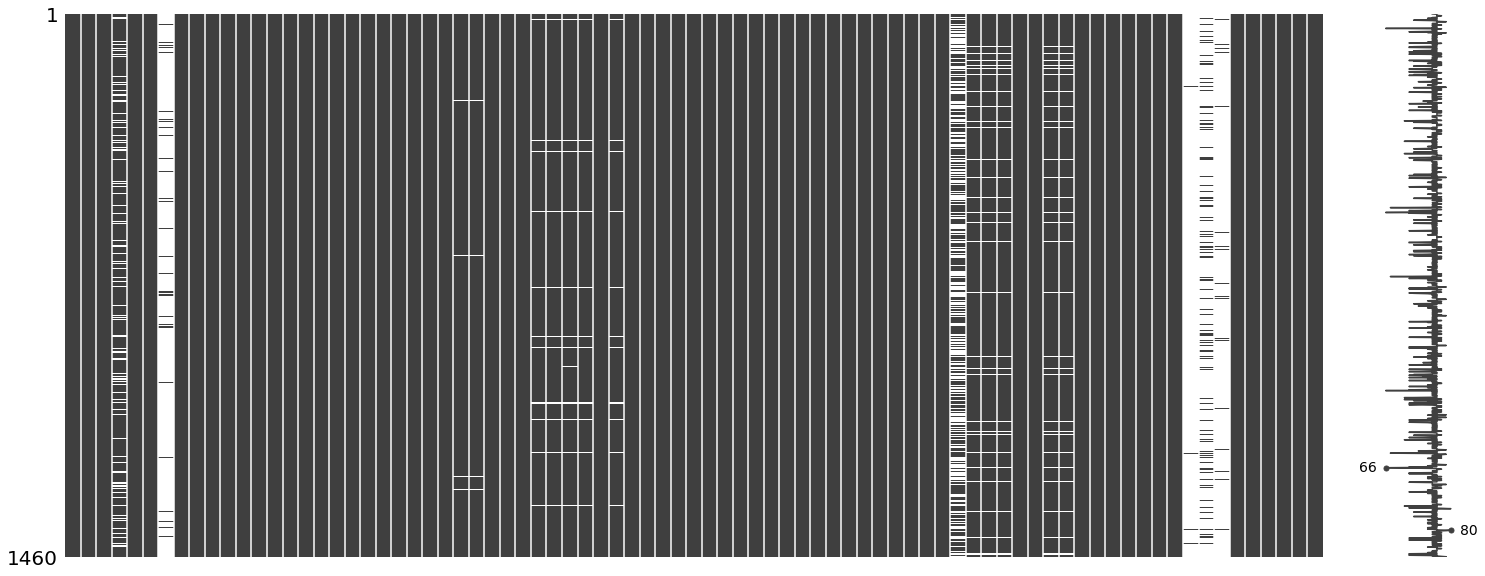

In [12]:
msno.matrix(df)

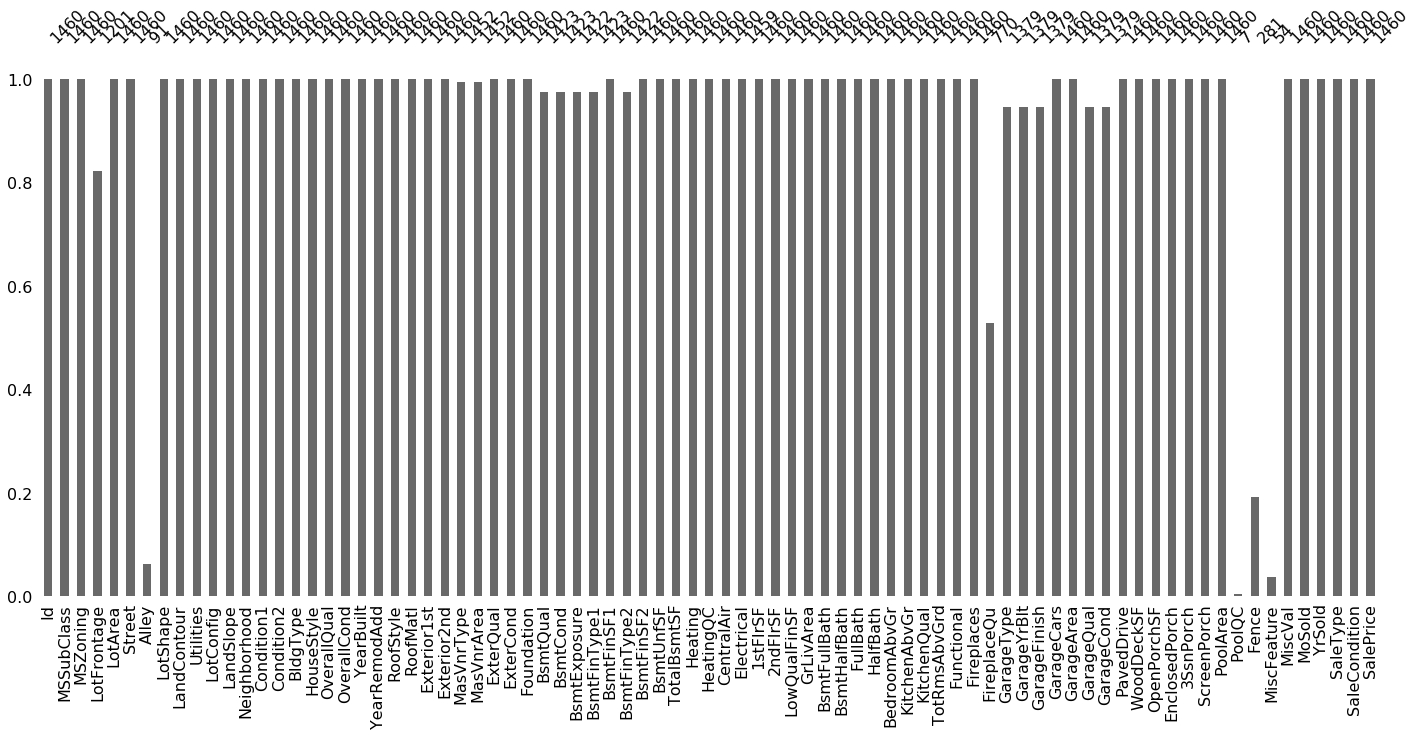

In [13]:
msno.bar(df, log=False)

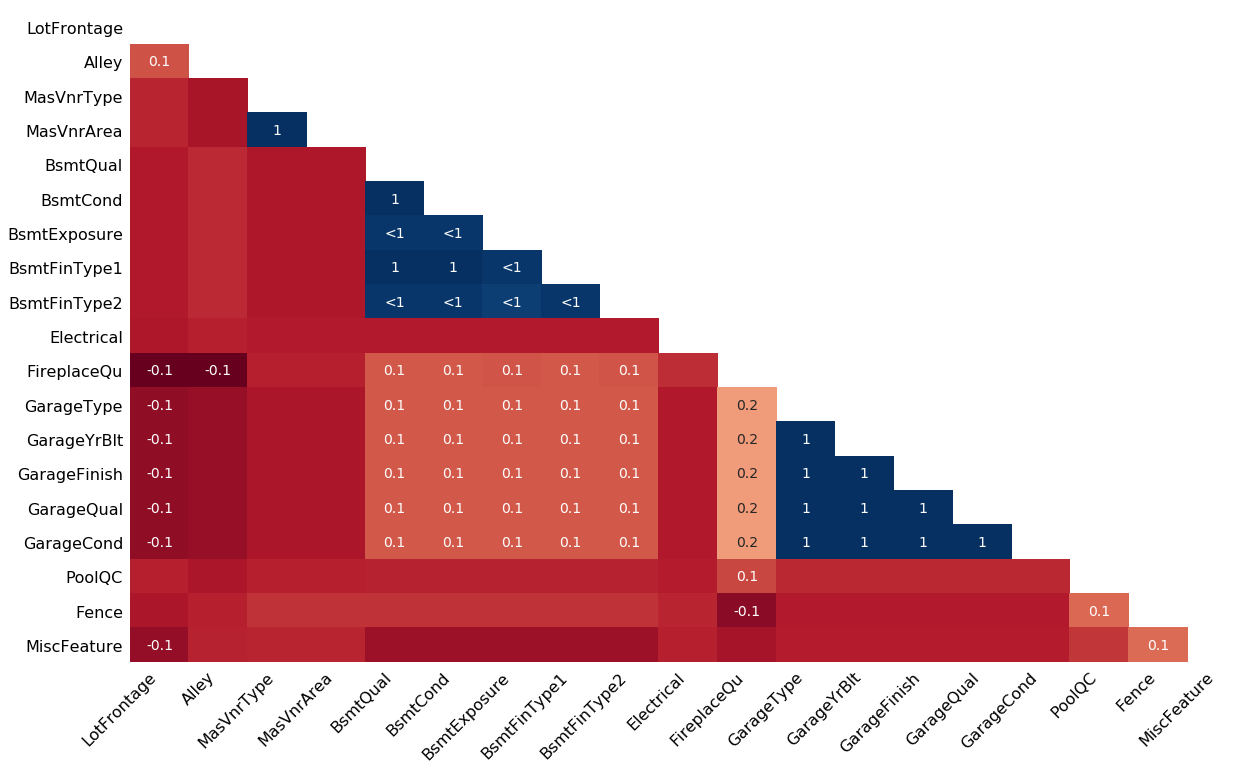

In [14]:
msno.heatmap(df)

## Clean Train Data

In [31]:
file = 'train_clean.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,1,65.0,8450,1,1,1,1,...,0,0,0,0,0,2,2008,1,1,208500
1,1,2,20,1,80.0,9600,1,1,1,1,...,0,0,0,0,0,5,2007,1,1,181500
2,2,3,60,1,68.0,11250,1,2,1,1,...,0,0,0,0,0,9,2008,1,1,223500
3,3,4,70,1,60.0,9550,1,2,1,1,...,272,0,0,0,0,2,2006,1,2,140000
4,4,5,60,1,84.0,14260,1,2,1,1,...,0,0,0,0,0,12,2008,1,1,250000


In [36]:
df.drop(labels='FireplaceQu', axis=1, inplace=True)

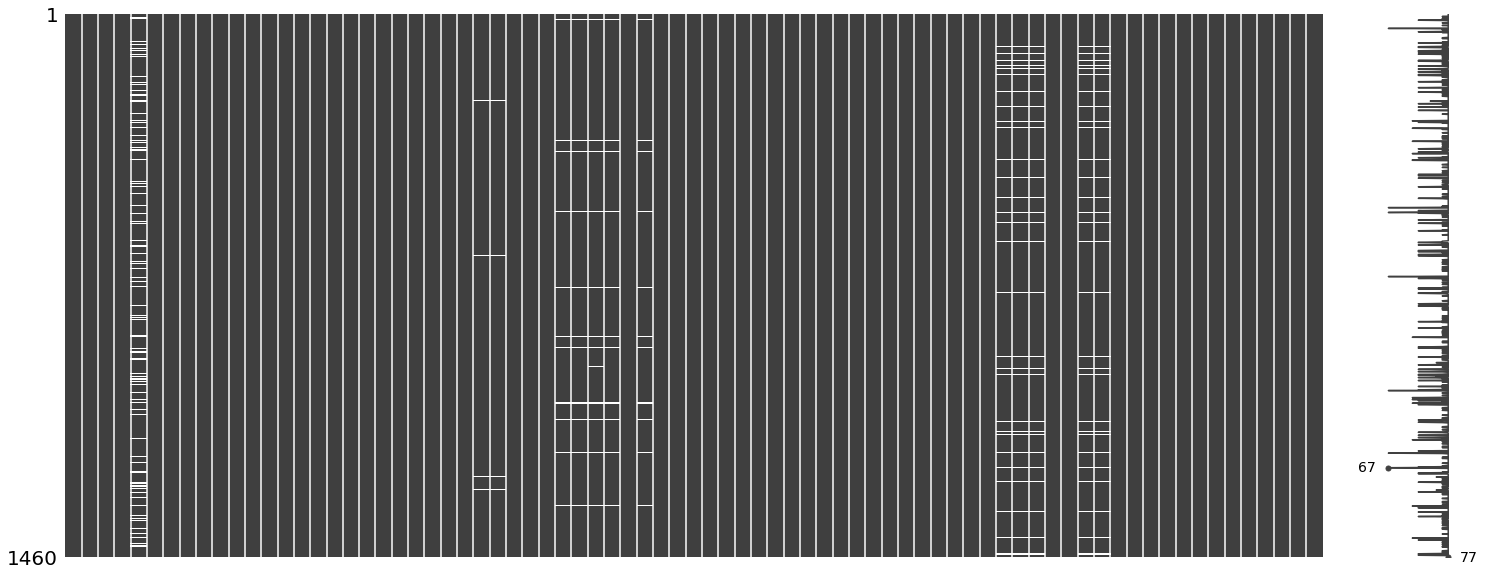

In [37]:
msno.matrix(df)

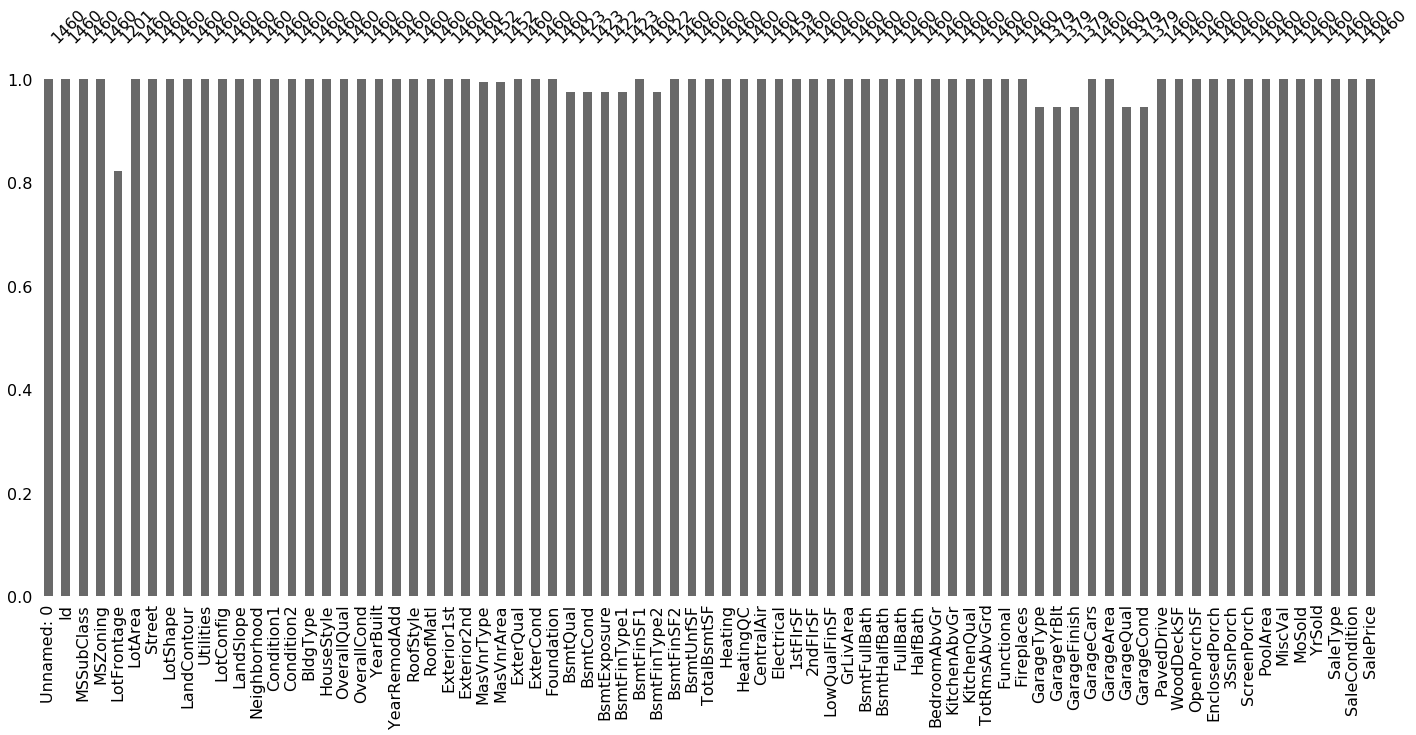

In [38]:
msno.bar(df)

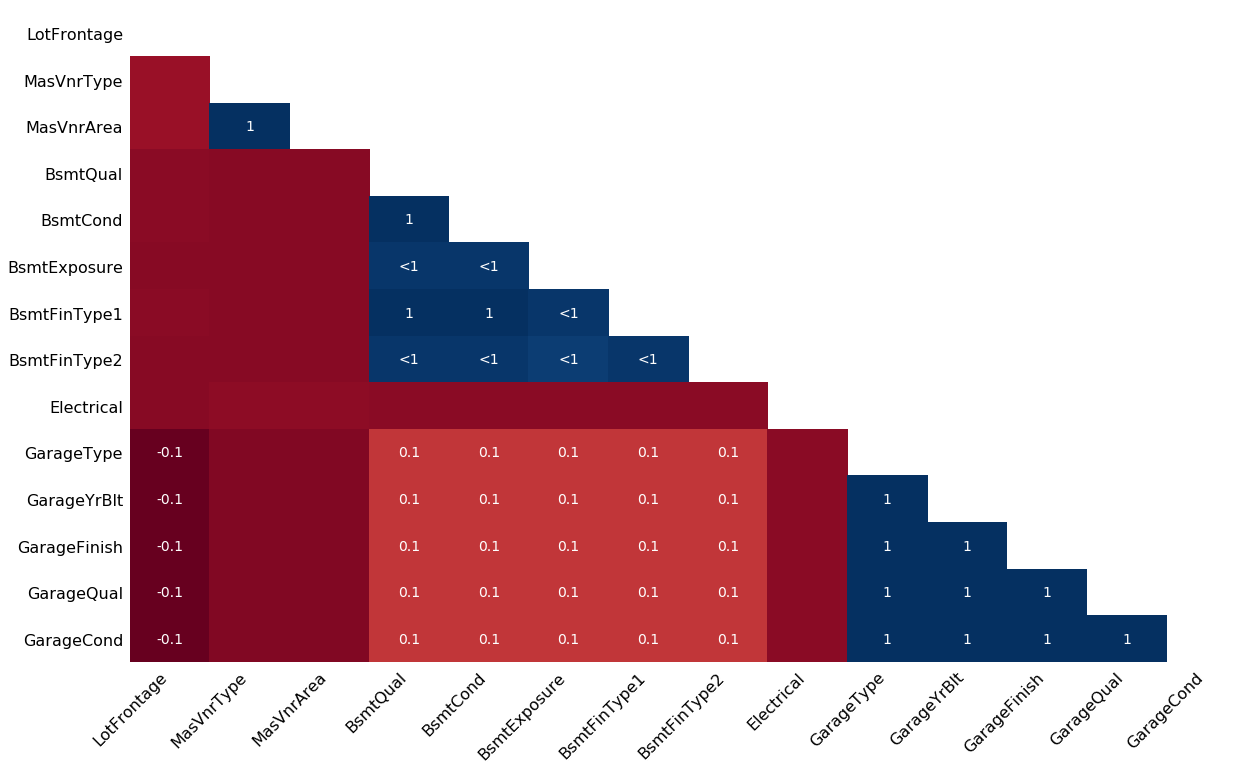

In [39]:
msno.heatmap(df)

Correlation =  `1`
* MasVnrType -> MasVnrArea
    * MasVnrType: Masonry veneer type
    * MasVnrArea: Masonry veneer area in square feet
        * `None`: None
* BsmtQual -> BsmtCond -> BsmtExposure -> BsmtFinType1 -> BsmtFinType2
    * BsmtQual: Evaluates the height of the basement
    * BsmtCond: Evaluates the general condition of the basement
    * BsmtExposure: Refers to walkout or garden level walls
    * BsmtFinType1: Rating of basement finished area
        * `NA`: No Basement
        * `No`: No Exposure
* GarageType -> GarageYrBlt -> GarageFinish -> GarageQual -> GarageCond
    * GarageType: Garage location
    * GarageYrBlt: Year garage was built
    * GarageFinish: Interior finish of the garage
    * GarageQual: Garage quality
    * GarageCond: Garage condition
        * `NA`: No Garage

Correlation =  `0`
* LotFrontage
    * LotConfig: Lot configuration
* Electrical
    * Electrical: Electrical system

## Impute Train Data

In [41]:
file = 'train_impute.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,1,65.0,8450,1,1,1,1,1,...,0,0,0,0,0,2,2008,1,1,208500
1,1,20,1,80.0,9600,1,1,1,1,2,...,0,0,0,0,0,5,2007,1,1,181500
2,2,60,1,68.0,11250,1,2,1,1,1,...,0,0,0,0,0,9,2008,1,1,223500
3,3,70,1,60.0,9550,1,2,1,1,3,...,272,0,0,0,0,2,2006,1,2,140000
4,4,60,1,84.0,14260,1,2,1,1,2,...,0,0,0,0,0,12,2008,1,1,250000


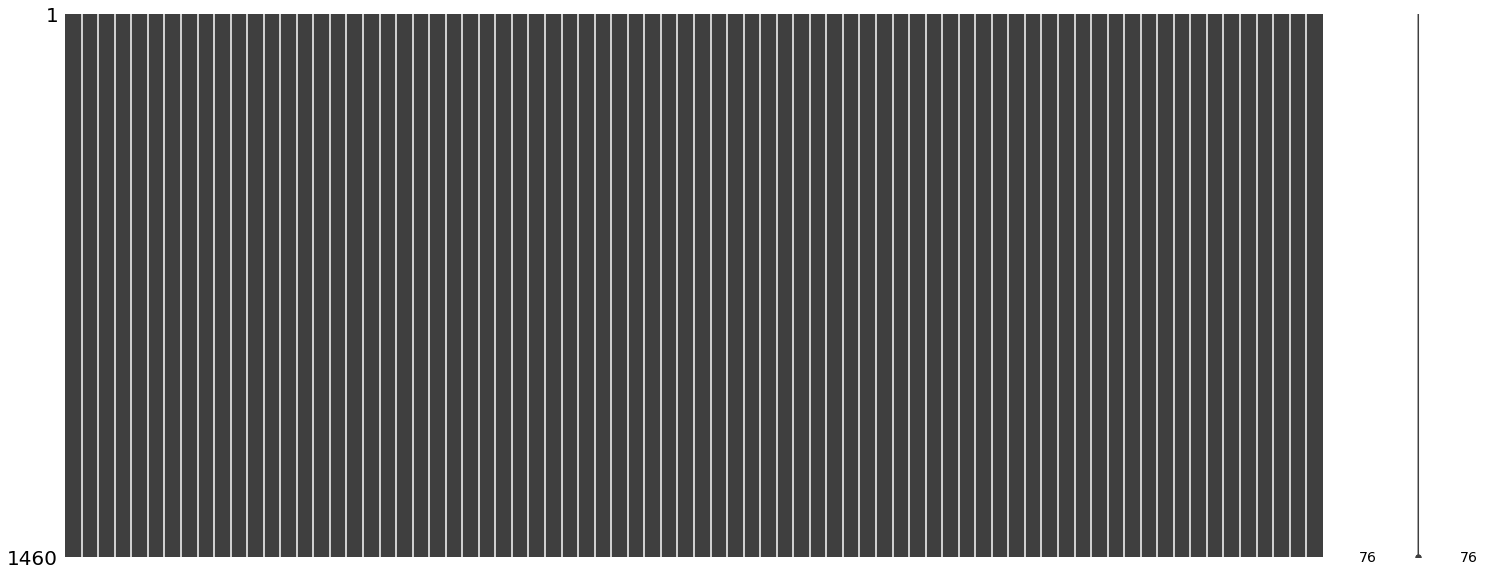

In [42]:
msno.matrix(df)

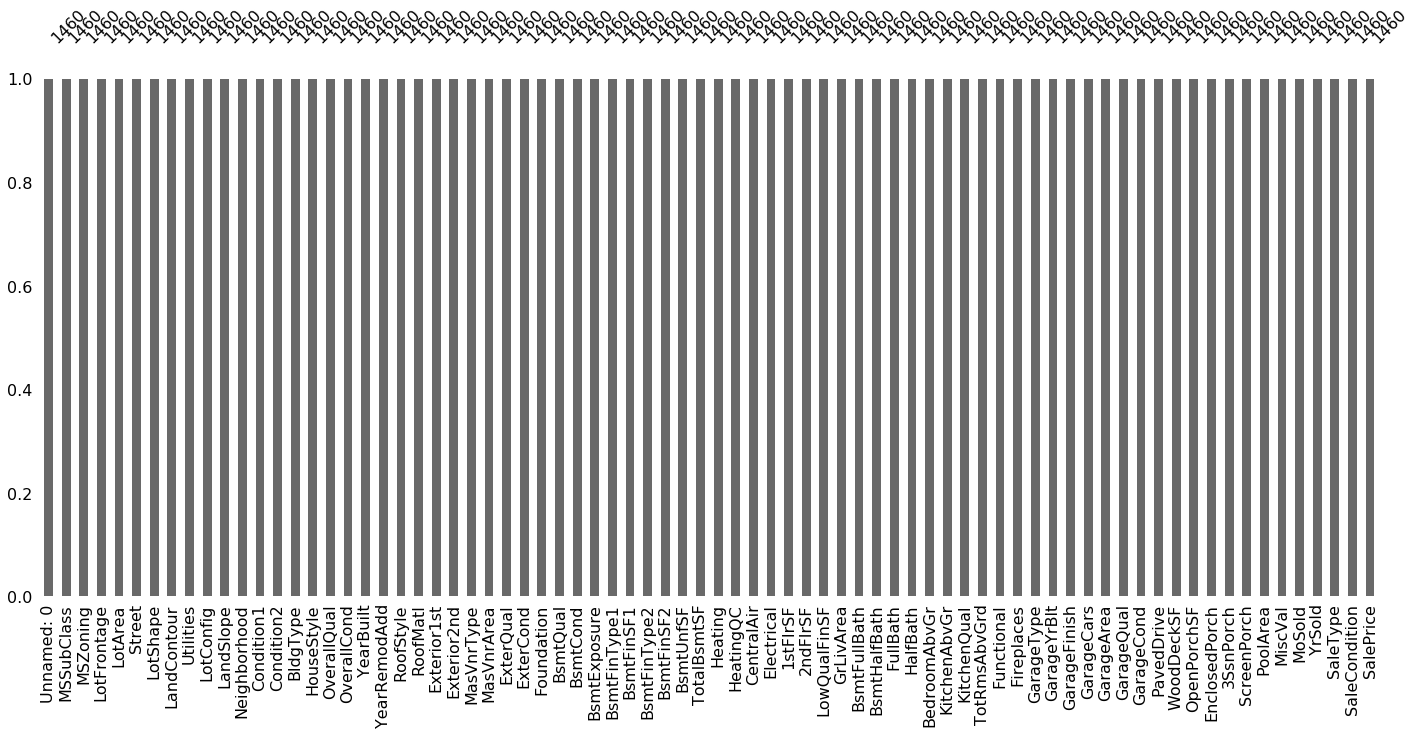

In [43]:
msno.bar(df)

## Test Data

In [45]:
file = 'test.csv'
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


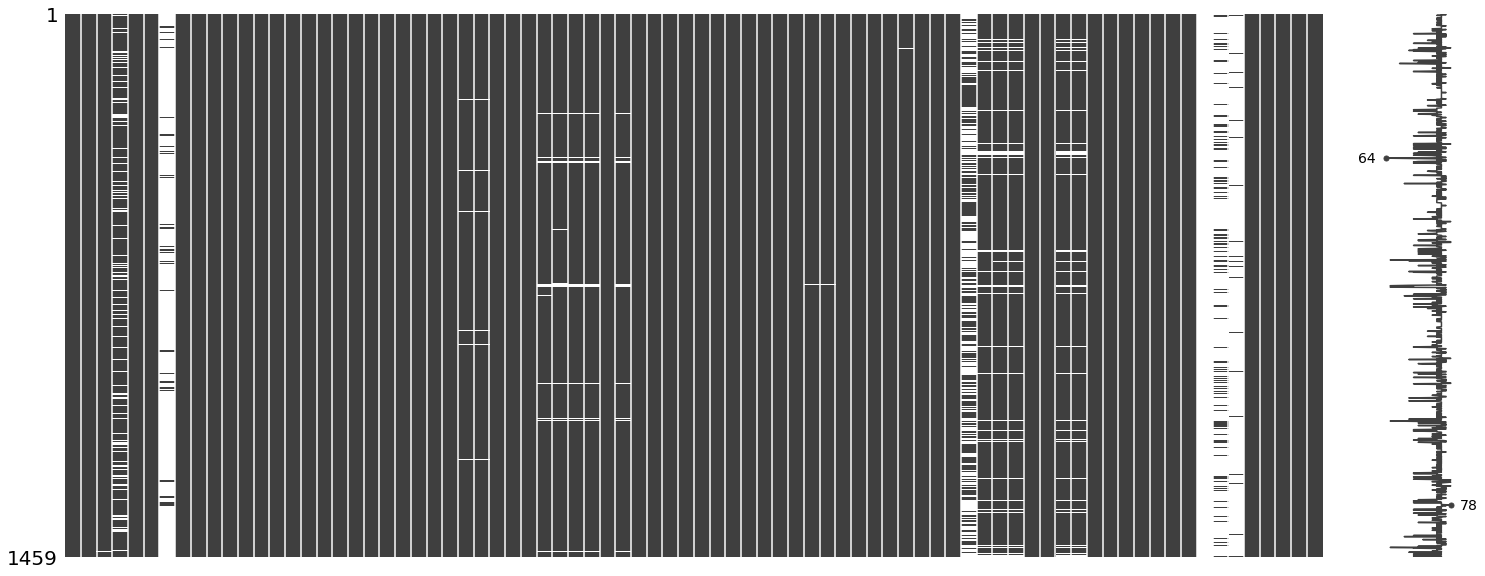

In [46]:
msno.matrix(df)

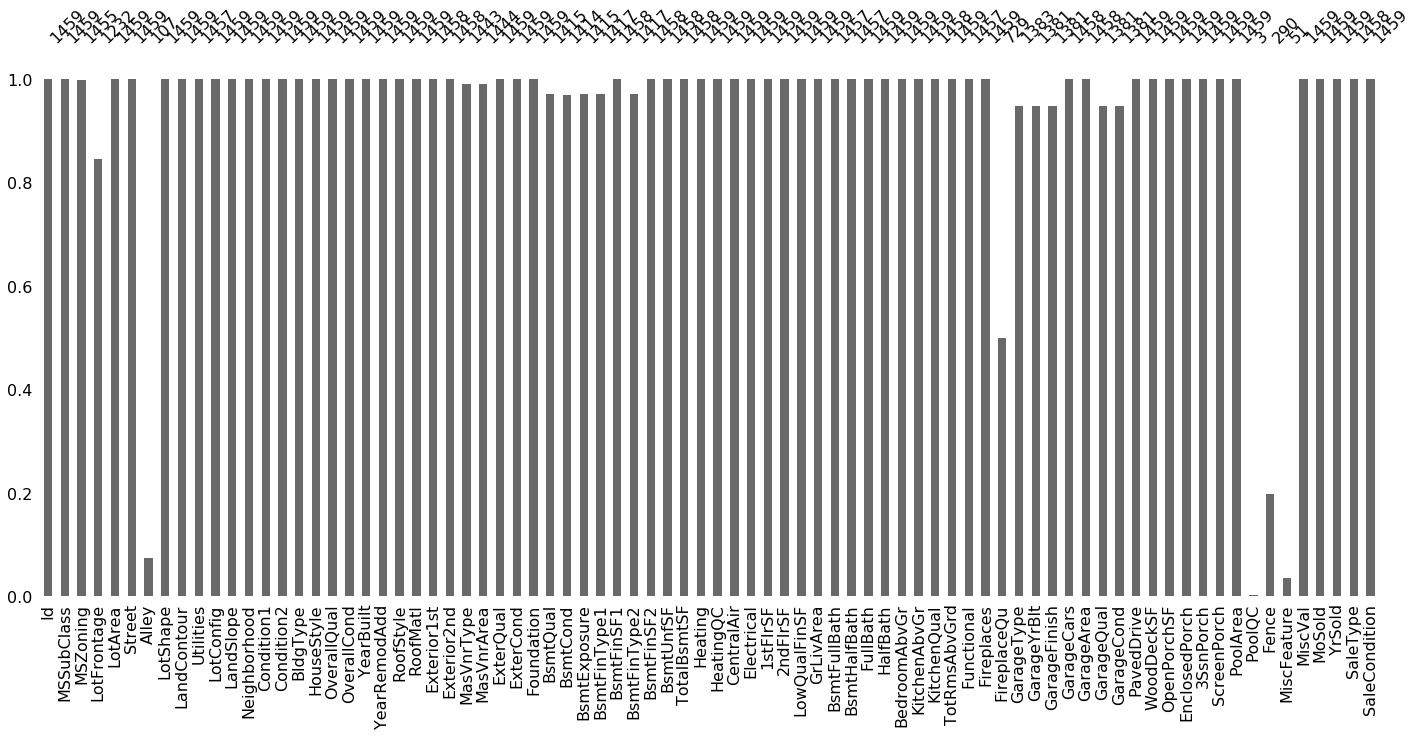

In [47]:
msno.bar(df)

## Test Clean Data

In [48]:
file = 'test_clean.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,1.0,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,0,120,0,0,6,2010,1.0,1
1,1,1462,20,0.0,81.0,14267,Pave,IR1,Lvl,AllPub,...,36,0,0,0,0,12500,6,2010,1.0,1
2,2,1463,60,0.0,74.0,13830,Pave,IR1,Lvl,AllPub,...,34,0,0,0,0,0,3,2010,1.0,1
3,3,1464,60,0.0,78.0,9978,Pave,IR1,Lvl,AllPub,...,36,0,0,0,0,0,6,2010,1.0,1
4,4,1465,120,0.0,43.0,5005,Pave,IR1,HLS,AllPub,...,82,0,0,144,0,0,1,2010,1.0,1


In [52]:
df.drop(labels=['FireplaceQu', 'Unnamed: 0'], axis=1, inplace=True)

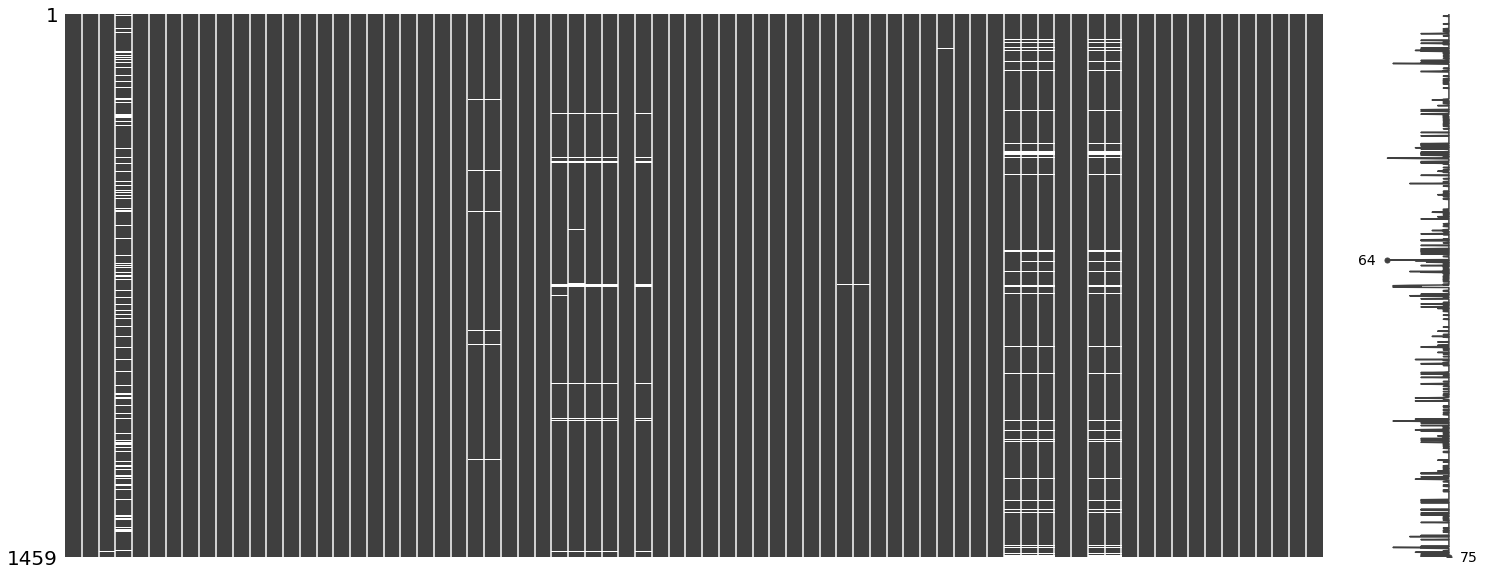

In [53]:
msno.matrix(df)

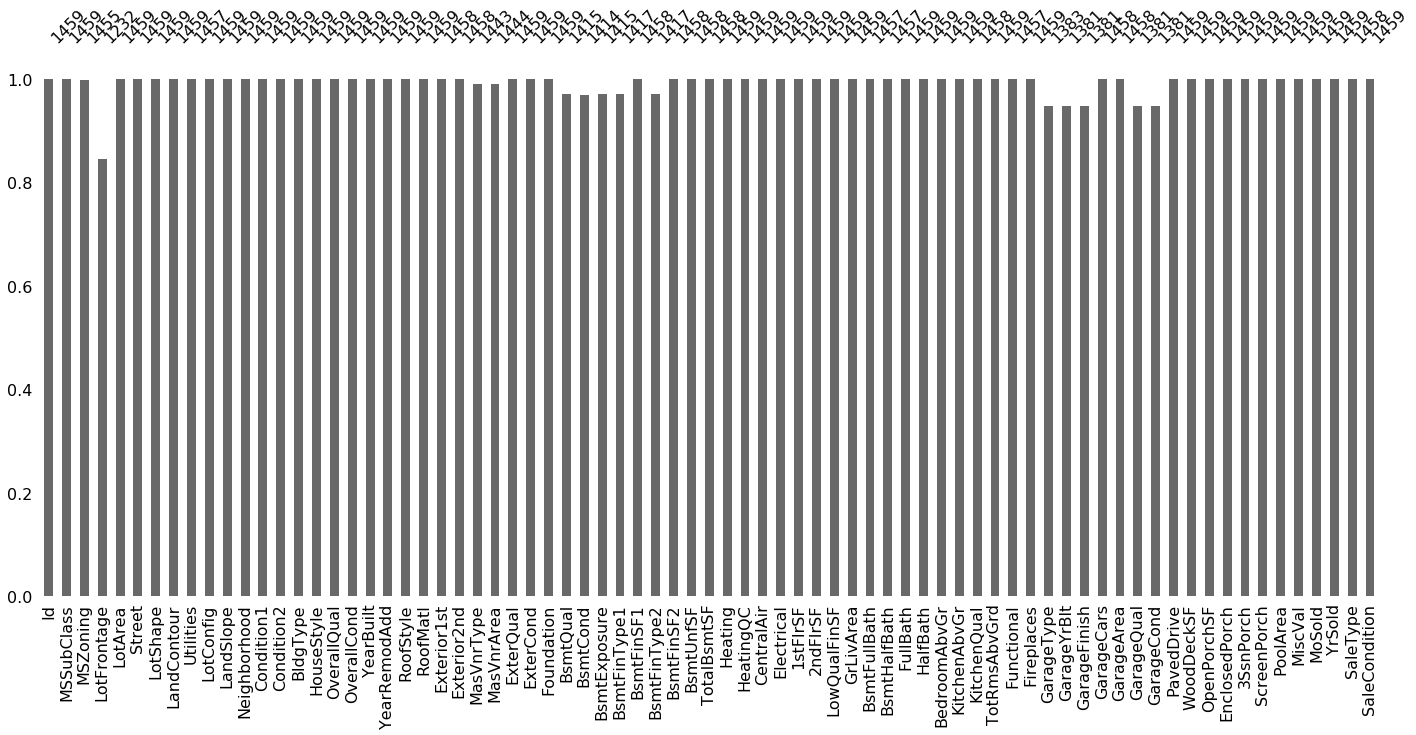

In [54]:
msno.bar(df)

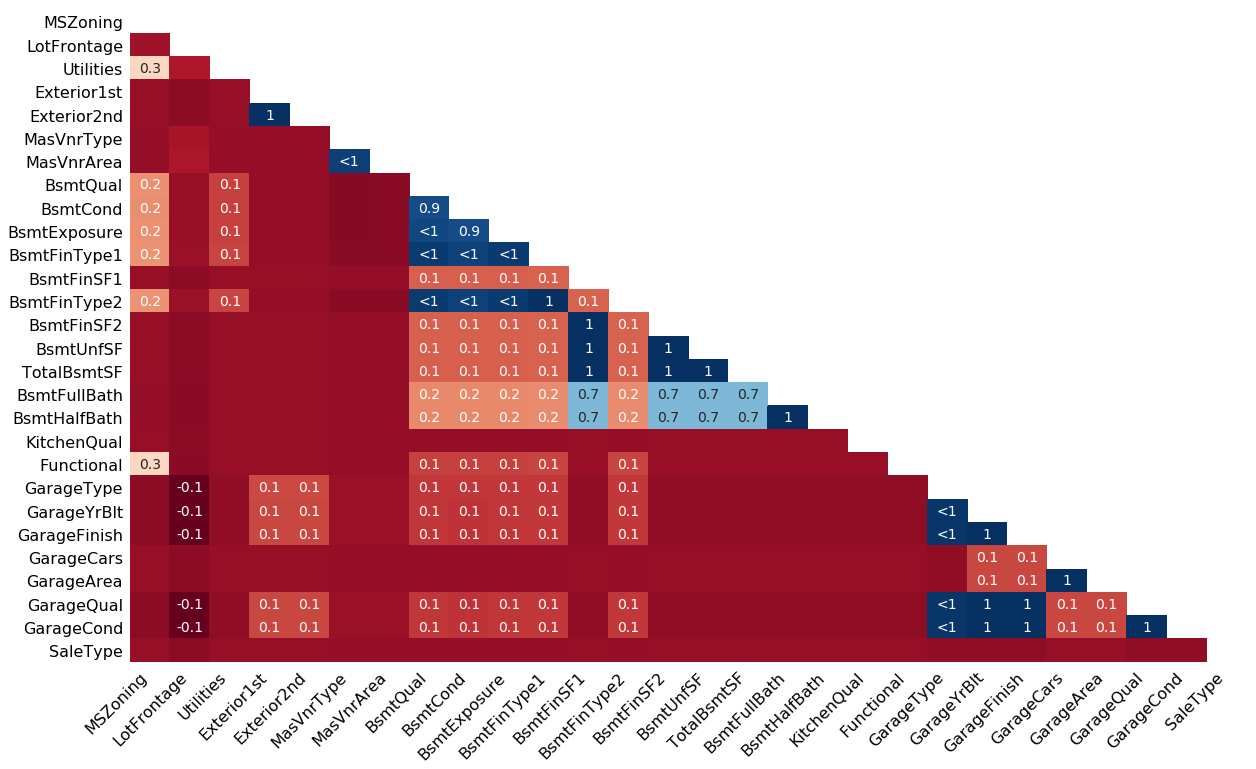

In [55]:
msno.heatmap(df)

Correlation =  `1`
* MasVnrType -> MasVnrArea
    * MasVnrType: Masonry veneer type
    * MasVnrArea: Masonry veneer area in square feet
        * `None`: None
* BsmtQual -> BsmtCond -> BsmtExposure -> BsmtFinType1 -> BsmtFinType2 -> BsmtFinSF1 -> BsmtFinSF2 -> BsmtUnfSF -> TotalBsmtSF -> BsmtFullBath -> BsmtHalfBath
    * BsmtQual: Evaluates the height of the basement
    * BsmtCond: Evaluates the general condition of the basement
    * BsmtExposure: Refers to walkout or garden level walls
    * BsmtFinType1: Rating of basement finished area
    * BsmtFinType2: Rating of basement finished area (if multiple types)
    * BsmtFinSF1: Type 1 finished square feet
    * BsmtFinSF2: Type 2 finished square feet
    * BsmtUnfSF: Unfinished square feet of basement area
    * TotalBsmtSF: Total square feet of basement area
    * BsmtFullBath: Basement full bathrooms
        * `NA`: No Basement
* GarageType -> GarageYrBlt -> GarageFinish -> GarageQual -> GarageCond
    * GarageType: Garage location
    * GarageYrBlt: Year garage was built
    * GarageFinish: Interior finish of the garage
    * GarageQual: Garage quality
    * GarageCond: Garage condition
        * `NA`: No Garage
* GarageCars -> GarageArea
    * GarageCars: Size of garage in car capacity
    * GarageArea: Size of garage in square feet
* Exterior1st -> Exterior2nd
    * Exterior1st: Exterior covering on house
    * Exterior2nd: Exterior covering on house (if more than one material)

Correlation =  `0`
* MSZoning
    * MSZoning: Identifies the general zoning classification of the sale.
* LotFrontage
    * LotConfig: Lot configuration
* Electrical
    * Electrical: Electrical system
* Utilities
    * Utilities: Type of utilities available
* Exterior1st
    * Exterior1st: Exterior covering on house
* Exterior2nd
    * Exterior2nd: Exterior covering on house (if more than one material)
* KitchenQual
    * KitchenQual: Kitchen quality
* Functional
    * Functional: Home functionality (Assume typical unless deductions are warranted)
* SaleType




